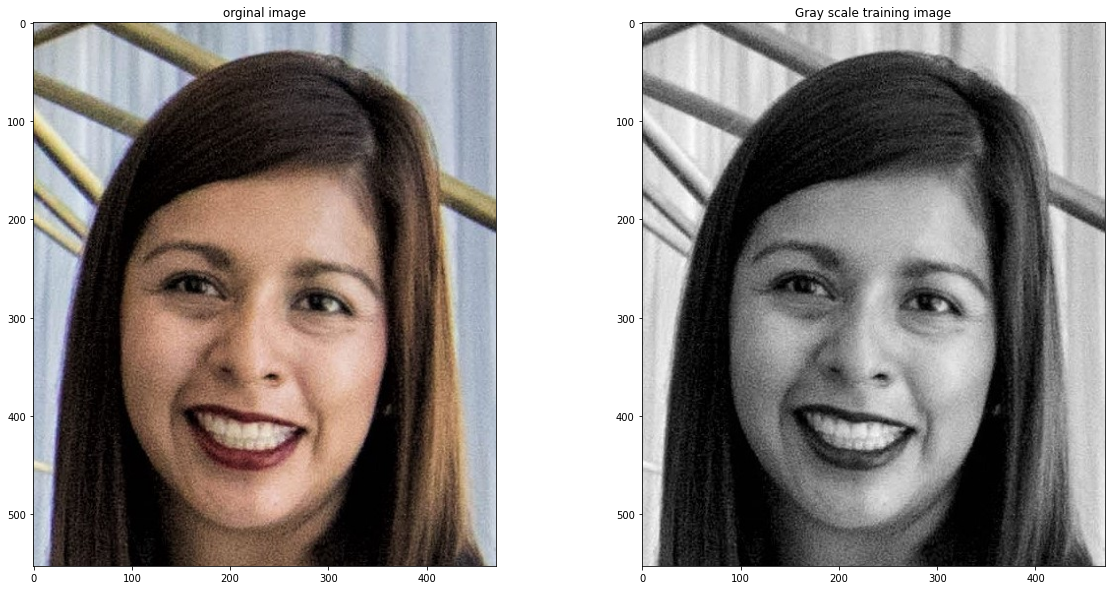

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline


# Set the default figure size
plt.rcParams['figure.figsize'] = [20,10]


# Load the training image
image = cv2.imread('./images/face.jpeg')

#covert training img into RGB
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the training image to gray Scale 
training_gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)

# Display the images
plt.subplot(121)
plt.title('orginal image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Gray scale training image')
plt.imshow(training_gray ,cmap='gray')



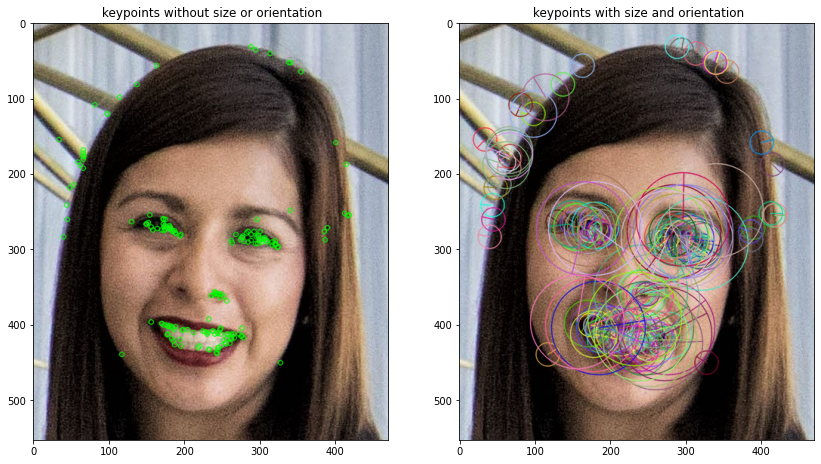


Number of keypoints Detected:  175


In [14]:
# Import copy to make copies of the training image
import copy

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0,10.0]

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(200, 2.0)

# Find the keypoints in the gray scale training image and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask.
keypoints , descriptor = orb.detectAndCompute(training_image,None)

# Create copies of the training image to draw our keypoints on

keypoint_without_size = copy.copy(training_image)

keypoint_with_size = copy.copy(training_image)

# Draw the keypoints without size or orientation on one copy of the training image 
cv2.drawKeypoints(training_image,keypoints,keypoint_without_size,color=(0,255,0))

# Draw the keypoints with size and orientation on the other copy of the training image
cv2.drawKeypoints(training_image,keypoints,keypoint_with_size,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with the keypoints without size or orientation
plt.subplot(121)
plt.title(' keypoints without size or orientation')
plt.imshow(keypoint_without_size)

plt.subplot(122)
plt.title(' keypoints with size and orientation')
plt.imshow(keypoint_with_size)

plt.show()

print("\nNumber of keypoints Detected: ",len(keypoints))

In [15]:
# Feature Matching

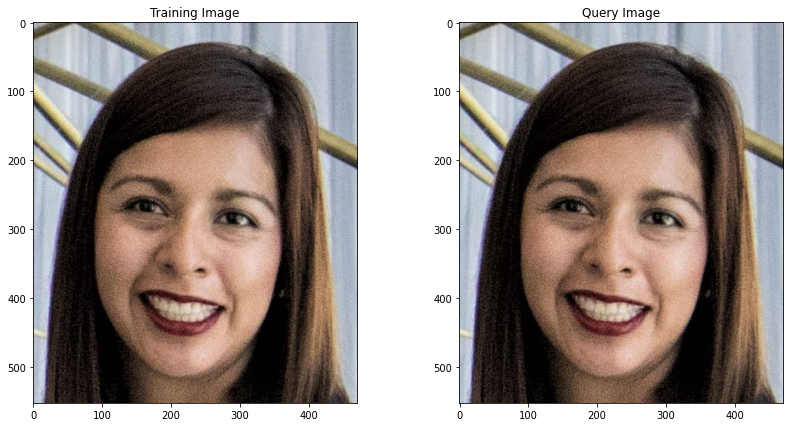

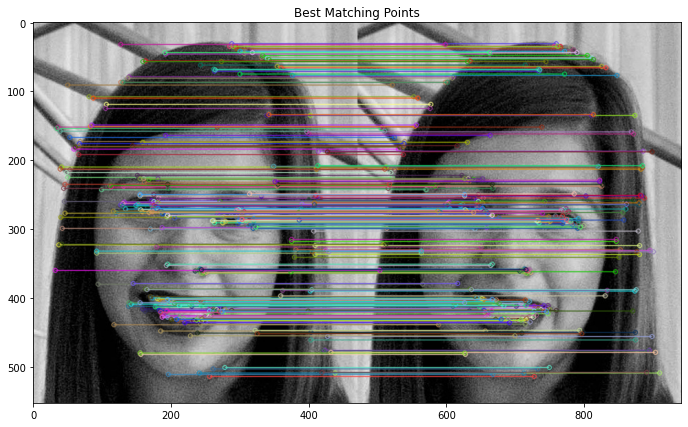

Number of Keypoints Detected In The Training Image:  821
Number of Keypoints Detected In The Query Image:  821

Number of Matching Keypoints Between The Training and Query Images:  821


In [16]:
import cv2
import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('./images/face.jpeg')

# Load the query image
image2 = cv2.imread('./images/face.jpeg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_image)
plt.show()

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(1000, 2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create a Brute Force Matcher object. Set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 300 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:300], query_gray, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))